1. Load the “used_car_price.csv” dataset
2. Split the data into 75% for training and 25% for testing
3. Train an XG-Boost model in Scikit-Learn
4. Assess trained XG-Boost model performance using RMSE and R2
5. Perform hyperparameters optimization using GridSearch, choose any reasonable values for max_depth, learning_rate, n_estimators, and colsample_bytree. Use 5 cross validation folds.
6. Perform hyperparameters optimization using RandomSearch, choose any reasonable values for max_depth, learning_rate, n_estimators, and colsample_bytree. Use 5 cross validation folds and 100 iterations.
7. Perform hyperparameters optimization using Bayesian optimization, choose any reasonable values for max_depth, learning_rate, n_estimators. Use 5 cross validation folds and 100 iterations.
8. Compare the 3 optimization strategies using RMSE and R2.

In [ ]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [8]:
df =pd.read_csv('used_car_price.csv')

In [3]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,3.5,6,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,2.0,4,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,2.4,4,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,3.2,6,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,3.5,6,225,18,24,3880,115,197


In [ ]:
df.tail()

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565,2.4,5,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565,2.3,5,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210,2.9,6,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,26135,1.9,4,170,22,29,2822,101,180
427,Volvo,XC70,Wagon,Europe,All,35145,2.5,5,208,20,27,3823,109,186


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int64  
 6   EngineSize   428 non-null    float64
 7   Cylinders    428 non-null    int64  
 8   Horsepower   428 non-null    int64  
 9   MPG_City     428 non-null    int64  
 10  MPG_Highway  428 non-null    int64  
 11  Weight       428 non-null    int64  
 12  Wheelbase    428 non-null    int64  
 13  Length       428 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 46.9+ KB


In [ ]:
df.describe() # MSRP - target; no outliers

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,3.196729,5.799065,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,1.108595,1.559679,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


<Axes: >

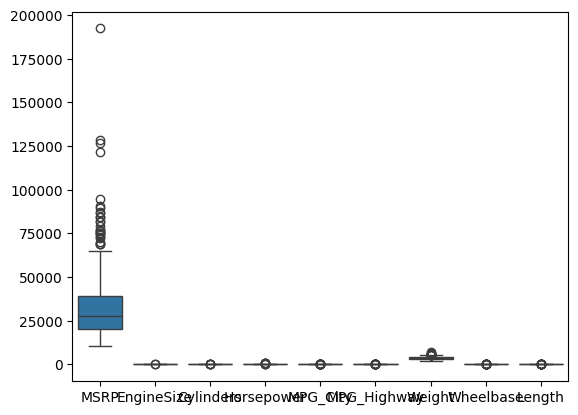

In [ ]:
#check if outliers in place
sns.boxplot(df) # only target variable has outliers

<Axes: >

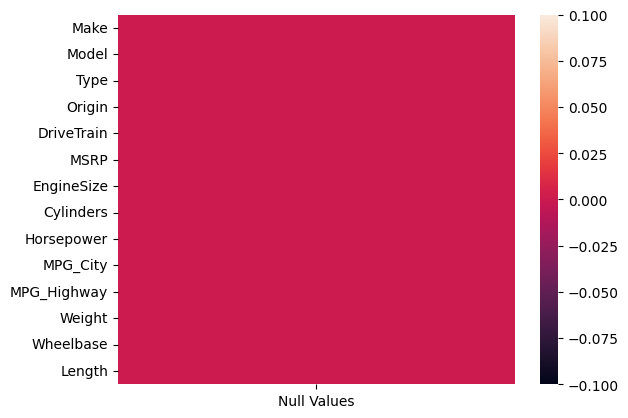

In [4]:
null_vals = df.isnull().sum()
null_vals_df = pd.DataFrame(null_vals, columns=['Null Values'])
sns.heatmap(null_vals_df)

In [9]:
# check for high cardinality
df =pd.read_csv('used_car_price.csv')
cat_col = df.select_dtypes(include='object').columns
print(cat_col)
df[cat_col].nunique()

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain'], dtype='object')


,0
Make,38
Model,425
Type,6
Origin,3
DriveTrain,3


In [10]:
# U=df.iloc[:,:4].values
# U2=df.iloc[:,6:].values
# U3=df.iloc[:,5].values
# U=np.concatenate((U,U2),axis=1)
# U.shape
df = pd.get_dummies(df, columns=cat_col, dtype=int)
df.head()
df.shape

(428, 484)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Columns: 479 entries, MSRP to DriveTrain_Rear
dtypes: bool(470), float64(1), int64(8)
memory usage: 226.7 KB


In [7]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
# U = encoder.fit_transform(U[:,:4])
# U.shape
#X = pd.DataFrame(encoder.fit_transform(df[cat_col]))
#X.index = df.index
#X.head()
#X = pd.concat([X, df.drop(cat_col, axis=1)], axis=1)
#X.head()

(428, 468)

In [11]:
# X = df.drop(['MSRP', 'Model'], axis=1)
X = df.drop(['MSRP'], axis=1)
y = df['MSRP']

In [15]:
X.shape, y.shape

((428, 483), (428,))

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((321, 483), (107, 483), (321,), (107,))

In [18]:
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [19]:
model.score(X_test, y_test)

0.8989446811250709

In [20]:
y_predict = model.predict(X_test)

In [22]:
res = np.concatenate((y_predict.reshape(len(y_predict),1), y_test.values.reshape(len(y_test),1)),1)
res[:5]

array([[48559.03515625, 37560.        ],
       [20545.1328125 , 21825.        ],
       [25727.33007812, 26189.        ],
       [32694.09765625, 37995.        ],
       [19012.1953125 , 24520.        ]])

In [23]:
def score(y_predict, y_test, X_test):
  k = X_test.shape[1]
  n = len(X_test)
  RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
  MSE = mean_squared_error(y_test, y_predict)
  MAE = mean_absolute_error(y_test, y_predict)
  r2 = r2_score(y_test, y_predict)
  adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
  print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)
  return RMSE, MSE, MAE, r2, adj_r2

In [24]:
RMSE, MSE, MAE, r2, adj_r2 = score(y_predict, y_test, X_test)
score_df = pd.DataFrame([['XGBoost', RMSE, MSE, MAE, r2, adj_r2]], columns=['Model', 'RMSE', 'MSE', 'MAE', 'R2', 'Adj R2'])

RMSE = 5843.427 
MSE = 34145642.76491487 
MAE = 4029.920496860397 
R2 = 0.8989446811250709 
Adjusted R2 = 1.0284134318322082


In [25]:
# Perform hyperparameters optimization using GridSearch, choose any reasonable
# values for max_depth, learning_rate, n_estimators, and colsample_bytree.
# Use 5 cross validation folds.
from sklearn.model_selection import GridSearchCV


params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
}
model_1 =  xgb.XGBRegressor(objective='reg:squarederror')
xgb_grid_search_cv = GridSearchCV(
    estimator=model_1,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
xgb_grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [26]:
xgb_grid_search_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}

In [27]:
xgb_grid_search_cv.best_score_

0.8125897117219012

In [28]:
y_pred = xgb_grid_search_cv.predict(X_test)

In [29]:
RMSE, MSE, MAE, r2, adj_r2 = score(y_pred, y_test, X_test)
score_df.loc[1] = ['XGBoost GridSearch', RMSE, MSE, MAE, r2, adj_r2]

RMSE = 5292.014 
MSE = 28005415.662443303 
MAE = 3691.2692757009345 
R2 = 0.9171169150489354 
Adjusted R2 = 1.0233039973602462


In [30]:
# Perform hyperparameters optimization using RandomSearch, choose any reasonable
# values for max_depth, learning_rate, n_estimators, and colsample_bytree.
# Use 5 cross validation folds and 100 iterations.
from sklearn.model_selection import RandomizedSearchCV
grid = {
        'n_estimators': [100, 500, 700],
        'max_depth': [2, 3, 5],
        'learning_rate': [0.1, 0.5, 1],
        'min_child_weight': [1, 2, 3],
        'colsample_bytree': [0.5, 0.8, 1],
        'booster': ['gbtree','gblinear']
      }

# grid = {
#    'n_estimators': [100, 500, 700],
#     'max_depth': [2, 3, 5],
#     'learning_rate': [0.1, 0.5, 1],
#      'min_child_weight': [1, 2, 3],
#     'booster': ['gbtree','gblinear']}
model_2 =  xgb.XGBRegressor(objective='reg:squarederror')

rs_csv_model = RandomizedSearchCV(
    estimator=model,
    param_distributions = grid,
    cv = 5,
    n_iter = 100,
    scoring = 'neg_mean_absolute_error',
    verbose = 5,
    return_train_score = True)
rs_csv_model.fit(X_train, y_train)

rs_csv_model.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=2, n_estimators=700;, score=(train=-0.236, test=-7892.117) total time=   2.4s
[CV 2/5] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=2, n_estimators=700;, score=(train=-0.233, test=-8083.907) total time=   3.0s
[CV 3/5] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=2, n_estimators=700;, score=(train=-0.191, test=-6474.148) total time=   3.1s
[CV 4/5] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=2, n_estimators=700;, score=(train=-0.000, test=-9722.729) total time=   3.3s
[CV 5/5] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.5, max_depth=5, min_child_weight=2, n_estimators=700;, score=(train=-0.234, test=-7611.833) total time=   2.3s
[CV 1/5] END booster=gbtree, colsampl

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [31]:
y_pred = rs_csv_model.predict(X_test)

In [32]:
RMSE, MSE, MAE, r2, adj_r2 = score(y_pred, y_test, X_test)
score_df.loc[2] = ['XGBoost RandomSearch', RMSE, MSE, MAE, r2, adj_r2]

RMSE = 6422.613 
MSE = 41249963.29572933 
MAE = 4086.271018910631 
R2 = 0.8779191763022756 
Adjusted R2 = 1.0343251122333124


In [ ]:
# Perform hyperparameters optimization using Bayesian optimization,
# choose any reasonable values for max_depth, learning_rate, n_estimators.
# Use 5 cross validation folds and 100 iterations.
! pip install scikit-optimize
from skopt import BayesSearchCV

In [34]:
mode_3 = xgb.XGBRegressor(objective='reg:squarederror')

In [35]:
search_space = {
    "learning_rate": (0.01, 1.0, "log-uniform"),
    "max_depth": (1, 50),
    "n_estimators": (5, 500),
}

In [36]:
xgb_bayes_search = BayesSearchCV(model,
                               search_space,
                               n_iter = 100,
                               scoring = 'neg_mean_absolute_error',
                               cv = 5)

In [37]:
xgb_bayes_search.fit(X_train, y_train)

BayesSearchCV(cv=5,
              estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
              n_iter=100, scoring='neg_mean_absolute_error',
              search_spaces={'learning_rate': (0.01, 1.0, 'log-uniform'),
                             'max_depth': (1, 50), 'n_estimators': (5, 500)})

In [38]:
y_pred = xgb_bayes_search.predict(X_test)

In [39]:
RMSE, MSE, MAE, r2, adj_r2 = score(y_pred, y_test, X_test)
score_df.loc[3] = ['XGBoost BayesSearch', RMSE, MSE, MAE, r2, adj_r2]

RMSE = 5516.635 
MSE = 30433265.40793157 
MAE = 3688.8533148364486 
R2 = 0.9099316020677187 
Adjusted R2 = 1.0253242710366626


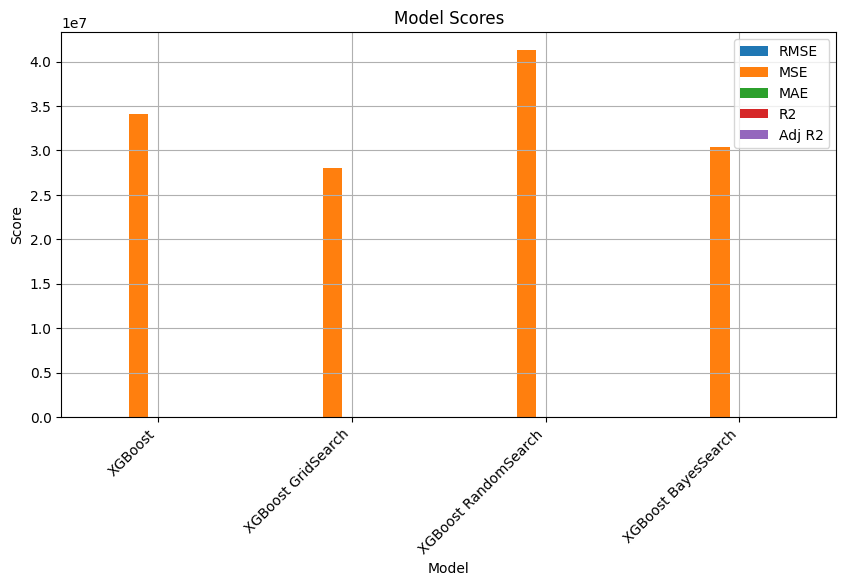

In [40]:
# Compare the 3 optimization strategies using RMSE and R2.
score_df.set_index('Model', inplace=True)
score_df.plot(kind='bar', figsize=(10,5))
plt.ylabel('Score')
plt.title('Model Scores')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()